In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2507,ham,Yup...,NaN,NaN,NaN
1985,ham,The length is e same but e top shorter n i got...,NaN,NaN,NaN
4689,ham,Ok no prob,NaN,NaN,NaN
2387,ham,Also where's the piece,NaN,NaN,NaN
1420,ham,No. She's currently in scotland for that.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing 
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website 
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [8]:
df.sample(5)

,v1,v2
1545,ham,"Good afternoon, my love ! Any job prospects ? ..."
42,spam,07732584351 - Rodger Burns - MSG = We tried to...
2081,ham,I'm aight. Wat's happening on your side.
1306,spam,Enjoy the jamster videosound gold club with yo...
94,ham,Havent planning to buy later. I check already ...


In [9]:
# renaming the columns 
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()

In [11]:
df['target']  = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values 
df.duplicated().sum()

403

In [14]:
# removing the duplicate values
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

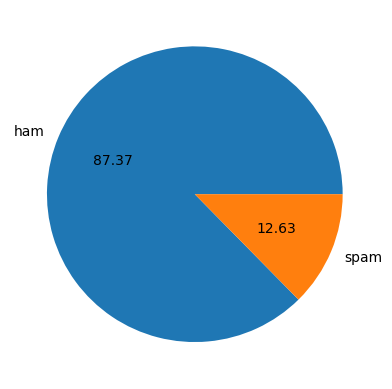

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced 


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arfan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham messages 
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam messages 
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

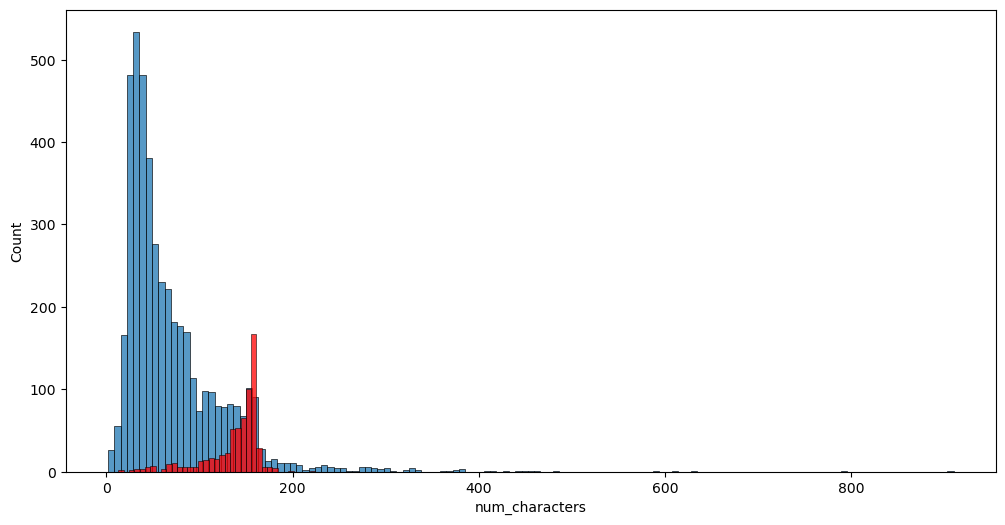

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

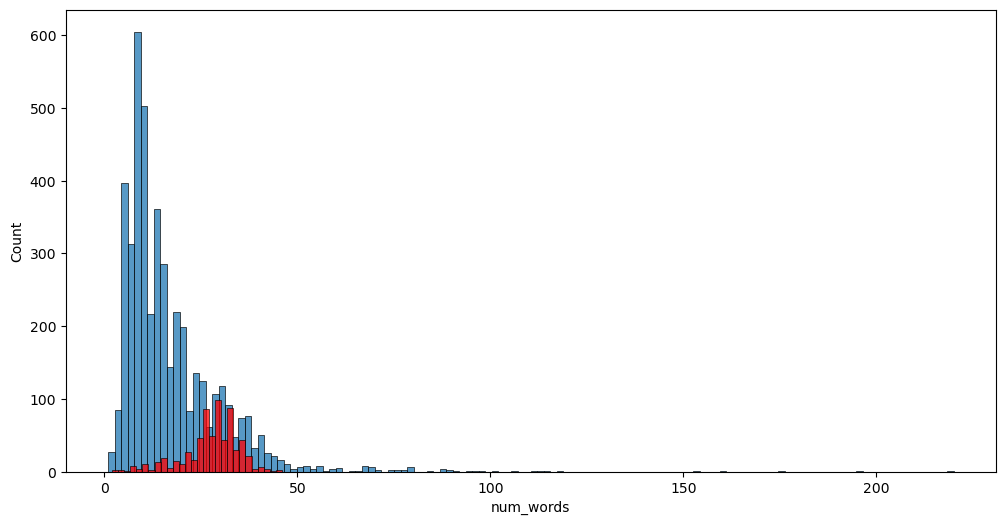

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

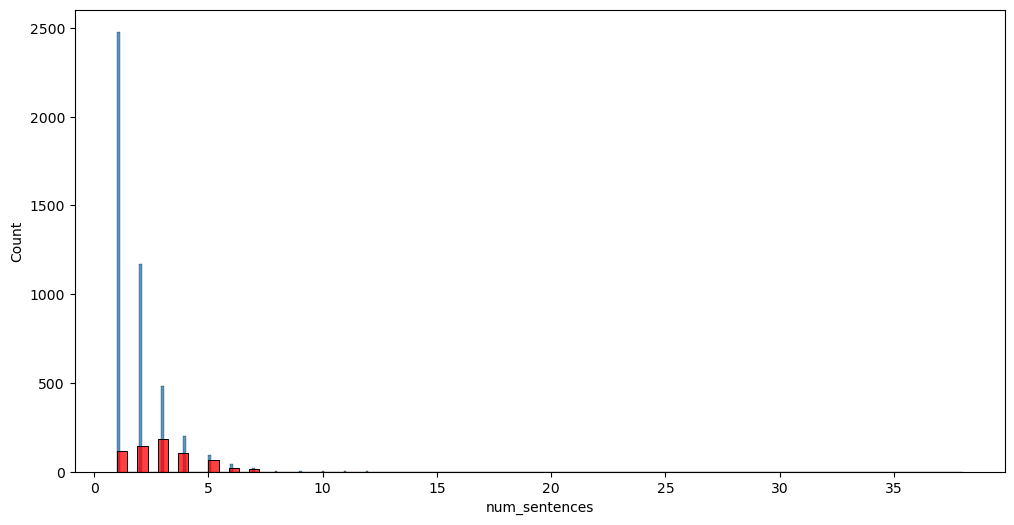

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

C:\Users\arfan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


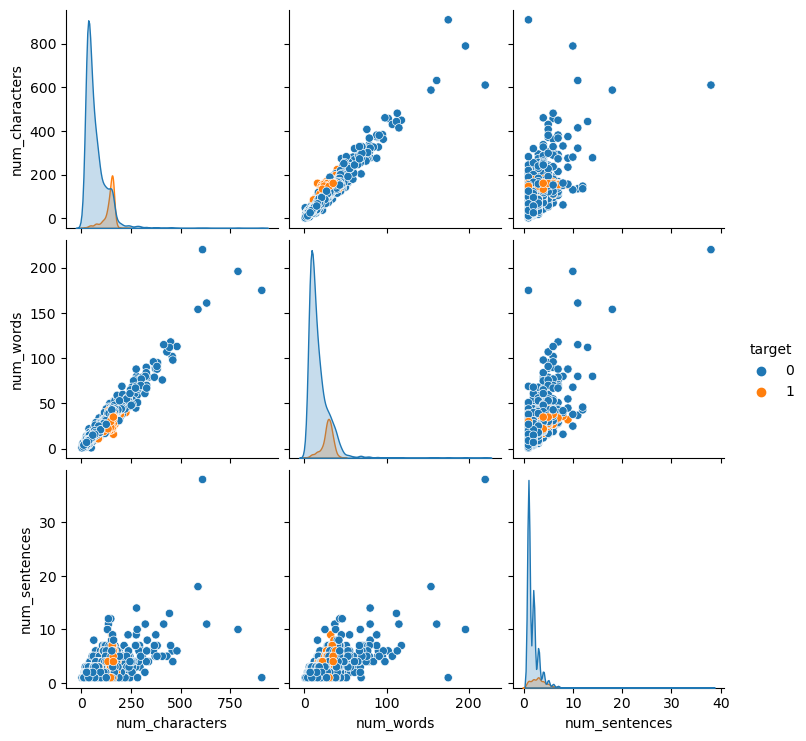

In [37]:
sns.pairplot(df, hue='target')

# 3. Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [41]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [42]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=  WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

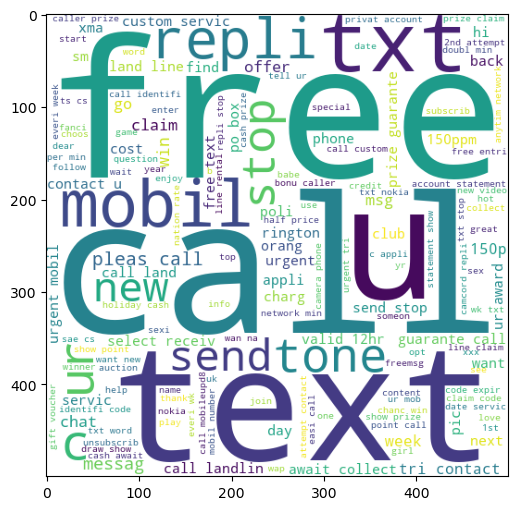

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

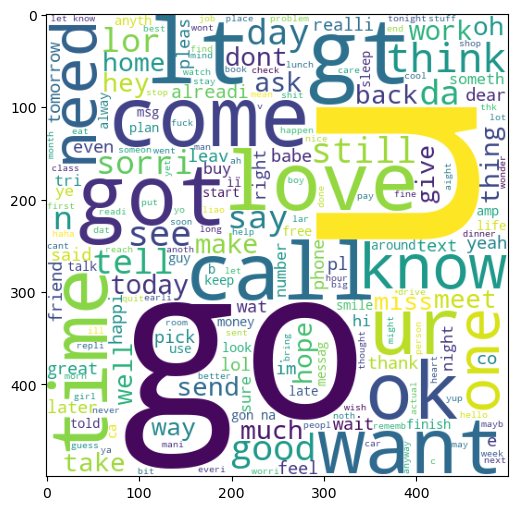

In [48]:
plt.figure(figsize=(15,6))
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [49]:
## Top 50 words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

In [54]:
from collections import Counter
Counter(ham_corpus).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

# 4. Model Building 

In [55]:
df.shape

(5169, 6)

In [56]:
spam_ds = df[df['target']==1]
spam_ds.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...


In [57]:
ham_ds = df[df['target']==0]
ham_ds.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent


In [58]:
ham_ds.shape

(4516, 6)

In [59]:
spam_ds.shape

(653, 6)

In [60]:
spam_ds = spam_ds.sample(4516, replace=True)

In [61]:
spam_ds.shape

(4516, 6)

In [62]:
new_df = pd.concat([spam_ds, ham_ds])

In [63]:
new_df.shape

(9032, 6)

In [64]:
new_df.tail()

,target,text,num_characters,num_words,num_sentences,transformed_text
5565,0,Huh y lei...,12,4,1,huh lei
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [65]:
df = new_df[:]

In [66]:
df.shape

(9032, 6)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
X_nb = tfidf.fit_transform(df['transformed_text']).toarray()

In [103]:
X_nb.shape

(9032, 3000)

In [104]:
y_nb = df['target'].values

In [105]:
y_nb

array([1, 1, 1, ..., 0, 0, 0])

In [106]:
from sklearn.model_selection import train_test_split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=2)

In [107]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [108]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train_nb, y_train_nb)
y_pred1_nb = gnb.predict(X_test_nb)
print(accuracy_score(y_test_nb, y_pred1_nb))
print(confusion_matrix(y_test_nb, y_pred1_nb))
print(precision_score(y_test_nb, y_pred1_nb))

0.9833978970669618
[[874  16]
 [ 14 903]]
0.9825897714907508


In [110]:
mnb.fit(X_train_nb, y_train_nb)
y_pred2_nb = mnb.predict(X_test_nb)
print(accuracy_score(y_test_nb, y_pred2_nb))
print(confusion_matrix(y_test_nb, y_pred2_nb))
print(precision_score(y_test_nb, y_pred2_nb))

0.9679026009961261
[[865  25]
 [ 33 884]]
0.9724972497249725


In [111]:
bnb.fit(X_train_nb, y_train_nb)
y_pred3_nb = bnb.predict(X_test_nb)
print(accuracy_score(y_test_nb, y_pred3_nb))
print(confusion_matrix(y_test_nb, y_pred3_nb))
print(precision_score(y_test_nb, y_pred3_nb))

0.9750968456004427
[[888   2]
 [ 43 874]]
0.997716894977169


In [112]:
## tfidf ----> bnb

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [114]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [115]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT': gbdt,
    'xgb':xgb
}

In [116]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [117]:
train_classifier(svc, X_train_nb, y_train_nb, X_test_nb, y_test_nb)

(0.9867183176535694, 0.9869138495092693)

In [118]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train_nb, y_train_nb, X_test_nb, y_test_nb)
    
    print("For ", name )
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9867183176535694
Precision -  0.9869138495092693
For  KN
Accuracy -  0.9784172661870504
Precision -  1.0
For  GNB
Accuracy -  0.9833978970669618
Precision -  0.9825897714907508
For  MNB
Accuracy -  0.9679026009961261
Precision -  0.9724972497249725
For  BNB
Accuracy -  0.9750968456004427
Precision -  0.997716894977169
For  DT
Accuracy -  0.8710570005534034
Precision -  0.9130434782608695
For  LR
Accuracy -  0.9645821804095185
Precision -  0.9691969196919692
For  RF
Accuracy -  0.9966795794133924
Precision -  0.9967284623773174
For  AdaBoost
Accuracy -  0.9369120088544549
Precision -  0.9663182346109176
For  BgC
Accuracy -  0.9773104593248478
Precision -  0.9572025052192067
For  ETC
Accuracy -  0.9972329828444937
Precision -  0.9978165938864629
For  GBDT
Accuracy -  0.9175428887659104
Precision -  0.9423963133640553
For  xgb
Accuracy -  0.9706696181516326
Precision -  0.9716157205240175


In [119]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [120]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.978417,1.000000
10,ETC,0.997233,0.997817
4,BNB,0.975097,0.997717
7,RF,0.996680,0.996728
0,SVC,0.986718,0.986914
2,GNB,0.983398,0.982590
3,MNB,0.967903,0.972497
12,xgb,0.970670,0.971616
6,LR,0.964582,0.969197
8,AdaBoost,0.936912,0.966318


In [121]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [122]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.978417
1,ETC,Accuracy,0.997233
2,BNB,Accuracy,0.975097
3,RF,Accuracy,0.996680
4,SVC,Accuracy,0.986718
5,GNB,Accuracy,0.983398
6,MNB,Accuracy,0.967903
7,xgb,Accuracy,0.970670
8,LR,Accuracy,0.964582
9,AdaBoost,Accuracy,0.936912


C:\Users\arfan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


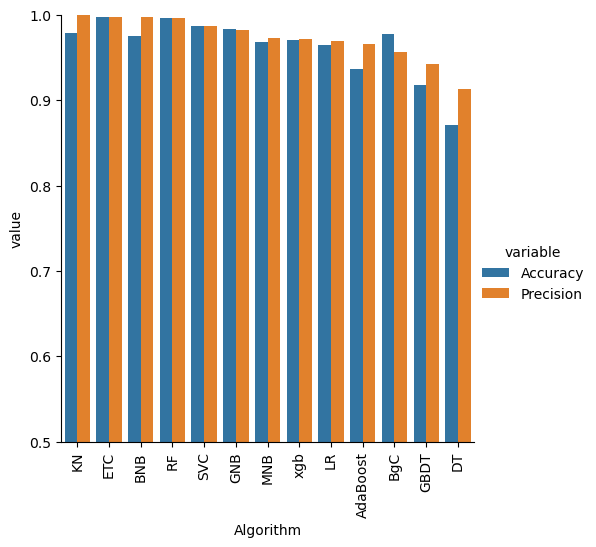

In [123]:
sns.catplot(x = 'Algorithm', y = 'value', hue='variable', data= performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [124]:
## Model Improvement
# 1. Change the max_features parameter of TfIdf

In [125]:
## Voting classifier 
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [126]:
voting = VotingClassifier(estimators=[('svm', svc), ('mnb', mnb), ('bnb', bnb), ('et', etc)], voting='soft')

In [127]:
voting.fit(X_train_nb, y_train_nb)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()), ('bnb', BernoulliNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [128]:
y_pred = voting.predict(X_test_nb)
print("Accuracy ", accuracy_score(y_test_nb, y_pred))
print("Precision ", precision_score(y_test_nb, y_pred))

Accuracy  0.9900387382401771
Precision  0.9966850828729282


In [134]:
bnb.fit(X_train_nb, y_train_nb)

BernoulliNB()

In [135]:
y_pred = bnb.predict(X_test_nb)

In [136]:
print("Accuracy ", accuracy_score(y_test_nb, y_pred))
print("Precision ", precision_score(y_test_nb, y_pred))

Accuracy  0.9750968456004427
Precision  0.997716894977169


In [137]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))